# Physics 5300 Double Pendulum 

<big><big>

William Hanegan <br>
Prof. Furnstahl <br>
1 May 2020 <br>

</big>



<br>

</big>

In [77]:
#start by importing all the packages we will need

%matplotlib notebook
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

<big>
The goal of this notebook is analyze the double pendulum. Pulling from our textbook, we find that the equations for total potential energy and Kinetic energy (11.37 and 11.38) are as follows: <br>
</big>
  
    
   

$T = \frac{1}{2}(m_1 + m_2) L_1^2 \dot{\phi}_1^2 + m_2 L_1 L_2 \dot{\phi_1} \dot{\phi_2}\cos(\phi_1 -\phi_2) + \frac{1}{2} m_2 L_2^2 \dot{\phi_2^2} $  
    
$U(\phi_1 , \phi_2) = (m_1 + m_2) g L_1 (1- \cos\phi_1) + m_2 g L_2 (1 - \cos\phi_2)$  

  


<big>

<big>
From these two equations we are able to create the Lagrangian for the system:
</big>

$\mathcal{L} = \frac{1}{2}(m_1 + m_2) L_1^2 \dot{\phi}_1^2 + m_2 L_1 L_2 \dot{\phi_1} \dot{\phi_2}\cos(\phi_1 -\phi_2) + \frac{1}{2} m_2 L_2^2 \dot{\phi_2^2} - (m_1 + m_2) g L_1 (1- \cos\phi_1) - m_2 g L_2 (1 - \cos\phi_2)  $
    
Now due to the restrictions of the python language we first need to find $\ddot{\phi_1}$ and $\ddot{\phi_2}$ if we are to attempt to solve the differential equation using python. The best find solve for these two is to first create two Lagrange Equations. The equations are as follows:

$\frac{\partial\mathcal{L}}{\partial\phi_1} = \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial\dot{\phi_1}}$
and
$\frac{\partial\mathcal{L}}{\partial\phi_2} = \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial\dot{\phi_2}}$

Plugging our Lagrangian into the two respective Lagrange's equation we receive the following.

$(m_1+m_2)L_1^2\ddot{\phi_1} + m_2 L_1 L_2 \cos(\phi_1 - \phi_2)\ddot{\phi_2} =  m_2 L_1 L_2 \dot{\phi_2} \sin(\phi_1 - \phi_2)(\dot{\phi_1} - \dot{\phi_2}) - m_2 L_1 L_2 \dot{\phi_1} \dot{\phi_2} \sin(\phi_1 - \phi_2) - (m_1 + m_2) g L_1 \sin\phi_1 $

and 

$m_2 L_2^2 \ddot{\phi_2} + m_2 L_1 L_2 \ddot{\phi_1} \cos(\phi_1 - \phi_2) = m_2 L_1 L_2 \dot{phi_1} \sin(\phi_1 - \phi_2) (\dot{\phi_1} - \dot{\phi_2}) + m_2 L_1 L_2 \dot{phi_1} \dot{\phi_2} \sin(\phi_1 - \phi_2 ) - m_2 g L_2 \sin \phi_2 $  


In order to condense the two equations down into something easier to work with we utilize a little linear algebra and write out our two Lagrange equations as a matrix operating on the vector containing the elements $\ddot{\phi_1}$ and $\ddot{\phi_2}$.


</big>    
    


<big><big>

$\begin{equation}
\begin{bmatrix}(m_1 + m_2)L_1^2  &  m_2 L_1 L_2 \cos(\phi_1 - \phi_2)\\m_2 L_1 L_2 \cos(\phi_1 - \phi_2) & m_2 L_2^2\end{bmatrix} 
\begin{bmatrix}\ddot{\phi_1} \\ \ddot{\phi_2}\end{bmatrix}
 \end{equation} = \begin{bmatrix}
(-m_2L_1L_2)\dot{\phi_2^2}\sin(\phi_1-\phi_2)-(m_1+m_2)gL_1\sin\phi_1\\
m_2L_1L_2\dot{\phi_1^2}\sin(\phi_1-\phi_2)-m_2gL_2\sin\phi_2
\end{bmatrix}$


Simplyfing this matrix equation for the sake of convenience we find:

<big>

$\begin{equation}
M \begin{bmatrix}\ddot{\phi_1} \\ \ddot{\phi_2}\end{bmatrix} 
\end{equation} = 
\begin{bmatrix}
X_0 \\
X_1
\end{bmatrix}
$

Operating with the inverse matrix then gives us: 

$\begin{equation}
\begin{bmatrix}\ddot{\phi_1} \\ \ddot{\phi_2}\end{bmatrix} 
\end{equation} = 
M^{-1}\begin{bmatrix}
X_0 \\
X_1
\end{bmatrix}
$

where

$M^{-1} = \frac{1}{det_M}  \begin{bmatrix}
d & -b\\
-c & a
\end{bmatrix}$,     where $ det_M = ad-bc $

<big>

$\begin{equation}
\begin{bmatrix}\ddot{\phi_1} \\ \ddot{\phi_2}\end{bmatrix} 
\end{equation} = 
\frac{1}{det_M}  \begin{bmatrix}
d & -b\\
-c & a
\end{bmatrix}
\begin{bmatrix}
X_0 \\
X_1
\end{bmatrix}
$

All of the values {a, b, c, d, det_m, $X_0$, $X_1$} will be defined in the below class DoublePendulum. Our new found relations for our two $\ddot{\phi}$'s will allow us to use the differential equation solver without encountering any problems.

Our differential equation solver requires a set of initial conditions to operate. We, therefore define an initial conditions vector ${Init}$:

$\begin{equation} Init = 
\begin{bmatrix}\phi_1(0)\\ \phi_2(0) \\ \dot{\phi_1}(0) \\ \dot{\phi_2}(0)\end{bmatrix}
\end{equation}$

And in the first argument, we need to give it a function which can take in ${Init}$ and its time derivative $\dot{Init}$

<br>
This operation is carried out in full in our dy_dt() function within the class DoublePendulum. Given some set of conditions, the function will carry out the opertion below:
<br>
$\begin{equation} 
\frac{d}{dt}(Init) = \dot{Init} = \begin{bmatrix}\dot{\phi_1}(t)\\ \dot{\phi_2}(t) \\ \ddot{\phi_1}(t) \\ \ddot{\phi_2}(t)\end{bmatrix}
\end{equation}$

In [78]:
class DoublePendulum():
    """
    DoublePenulum class goes through the process of implementing the paramaters of the double pendulum and solves the 
    resulting differential equation (Detail's can be found in Chapter 11 of Taylor as is specified in the problem set).
     
    Parameters
    ----------
    m1 and m2 : float
        These two parameters are the masses of the upper and lower pendulum respectively.
    l1 and l2 : float
        These are the length parameters for the upper and lower pendulum respectively.
            

    Methods
    -------
    dy_dt(y, t)
        Returns the time derivative of the elements of Init.
    solve_ode(t_pts, phi_1_0, phi_2_0, d_phi_1_0, d_phi_2_0)
        Takes in initial conditions and time array of different times (t). It then proceeds to solve the differential
        equation based on the given conditions.
    """
    
    
    def __init__(self, m_1 = 1.0, m_2 = 1.0,
                 l_1 = 1., l_2 = 1.
                ):
        self.m_1 = m_1
        self.m_2 = m_2
        self.l_1 = l_1
        self.l_2 = l_2
        self.g = 1       #gravity

    
    def dy_dt(self, Init, t_pts):
        """
        dy_dt takes the vector Init and returns the time derivative: 
       d/dt  [(phi_1) (phi_2) (d phi_1 / dt) (d phi_2 / dt)]
        
        Parameters
        ----------
        Init : float
            A 4-component vector with Init[0] = phi_1(t), Init[1] = phi_2(t)
            Init[2] = d phi_1 / dt, and Init[3] = d phi_2 / dt
        t : float
            time points array
            
        Returns
        -------
        
        Init': {Init'[0] = y[2], Init'[1] = y[3],
        Init'[2] = d^2 phi_1 / dt^2, and Init'[3] = d^2 phi_2 / dt^2}
        """
        
        a = (self.m_1 + self.m_2)*self.l_1**2
        b = self.m_2*self.l_1*self.l_2*np.cos(Init[0] - Init[1])
        c = b #the m matrix is symmetric so we can do this 
        d = self.m_2*self.l_2**2
        
        det_m = a*d - b*c #determinate of the matrix
        
        
        # x_0 and x_1 are the same x_0 and x_1 as is found above in the description of methodology for solving the problem.
        
        x_0 = (-self.m_2*self.l_1*self.l_2)*(Init[3]**2)*np.sin(Init[0]-Init[1]) - \
               (self.m_1 + self.m_2)*self.g*self.l_1*np.sin(Init[0])
        
        x_1 = self.m_2*self.l_1*self.l_2*(Init[2]**2)*np.sin(Init[0]-Init[1]) - \
                self.m_2*self.g*self.l_2*np.sin(Init[1])
        
        
        
        return [Init[2], Init[3], (d*x_0 - b*x_1)/det_m, (-c*x_0 + a*x_1)/det_m ]
    
 
    
    def solve_ode(self, t_pts, phi_1_0, phi_2_0, d_phi_1_0, d_phi_2_0, 
                  abserr=1.0e-8, relerr=1.0e-6):
        """
        Solves the Differential Equations given the
        Initial conditions for Init and some set of
        time points t. Returns the solutions for Init
        """
        Init = [phi_1_0, phi_2_0, d_phi_1_0, d_phi_2_0]  #initial conditions
        phi_1, phi_2, d_phi_1, d_phi_2 = odeint(self.dy_dt, Init, t_pts, 
                              atol=abserr, rtol=relerr).T
        return phi_1, phi_2, d_phi_1, d_phi_2

<big>

So now that we have our class set up, lets put it to the test. We will need an array of time points, and we should choose some reasonable values for masses and lengths. I'll also make a function which takes in starting and ending times and gets the corresponding indices for our solution arrays, in case we want to make plots for specific time ranges.

In [79]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index



t_pts = np.arange(0, 50, 0.01) 

m_1 = 1.0
m_2 = 1.0
l_1 = 1.0
l_2 = 1.0

test = DoublePendulum(m_1, m_2, l_1, l_2)

<big> We can now proceed to solve the problem utilzing the class we just created. I'll first specify some initial conditions. The ones I choose are the ones given to us by our Professor in an example of the resulting plots. After using the class to solve the differential equations I then proceed to plot the angle versus time for the two pendulums as well as a phase space plot.

In [80]:
phi1_0 = np.pi/2
phi2_0 = np.pi
phidot1_0 = 0.0
phidot2_0 = 0.0

my_pen = DoublePendulum(m_1, m_2, l_1, l_2)

phi1, phi2, phidot1, phidot2 = my_pen.solve_ode(t_pts, phi1_0, phi2_0, phidot1_0, phidot2_0)

<IPython.core.display.Javascript object>


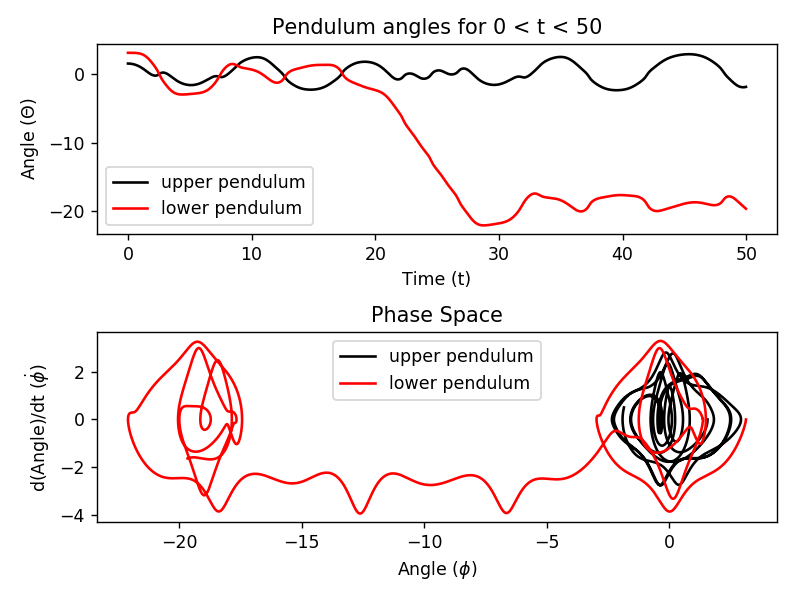

In [81]:
start, stop = start_stop_indices(t_pts, 0, 50)






fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
ax1.plot(t_pts[start:stop], phi1[start:stop],'k', label=('upper pendulum'))
ax1.plot(t_pts[start:stop], phi2[start:stop],'r', label = ('lower pendulum'))
ax1.legend()
ax1.set_title('Pendulum angles for 0 < t < 50')
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('Angle (${\Theta}$)')

ax2 = fig.add_subplot(2,1,2)
ax2.plot(phi1[start:stop], phidot1[start:stop],'k',  label=('upper pendulum'))
ax2.plot(phi2[start:stop], phidot2[start:stop],'r', label = ('lower pendulum'))
ax2.legend()
ax2.set_title('Phase Space')
ax2.set_xlabel('Angle (${\phi}$)')
ax2.set_ylabel('d(Angle)/dt ($\dot{\phi}$)')

fig.tight_layout()
fig.show()

<br>
<big>
As we can see, not only does the plot of angle vs time match expectation, our phase space plot tell us about the chaotic motion of the pendulums. As we can see, the phase space of the upperr pendulum matches our expectation of non chaotic motion whereas the lower pendulum appears to demonstrate chaotic motion when it the upper pendulum pulls it from one side ot the other. It would appear that there are periods of time whre the lower pendulum experience non-chaotic motion until it is brought back into chaos.